Необходимые импорты

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

Подготовка данных

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

category_dict = {0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine'}

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Создание и обучение модели

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 67s 44ms/step - loss: 0.1542 - accuracy: 0.9515 - val_loss: 0.0619 - val_accuracy: 0.9807
Epoch 2/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.0593 - val_accuracy: 0.9831
Epoch 3/5
1500/1500 [==============================] - 65s 44ms/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.0318 - val_accuracy: 0.9911
Epoch 4/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0315 - val_accuracy: 0.9912
Epoch 5/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0333 - val_accuracy: 0.9909


Оценка качества модели

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0237 - accuracy: 0.9917


[0.02366000786423683, 0.9916999936103821]

Поиск неверных результатов

313/313 [==============================] - 4s 12ms/step
83
Value: 5


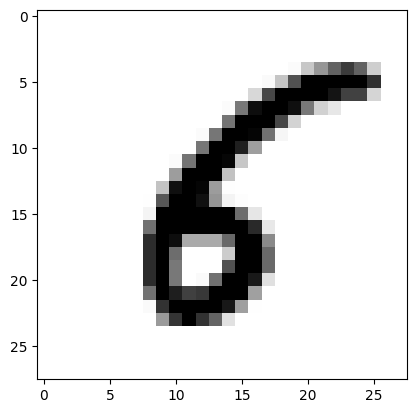

Value: 2


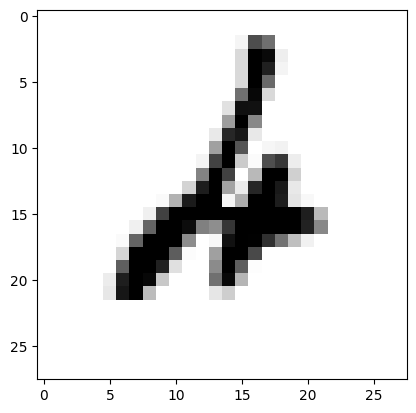

Value: 3


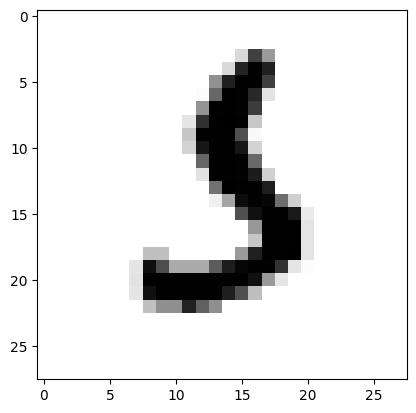

Value: 5


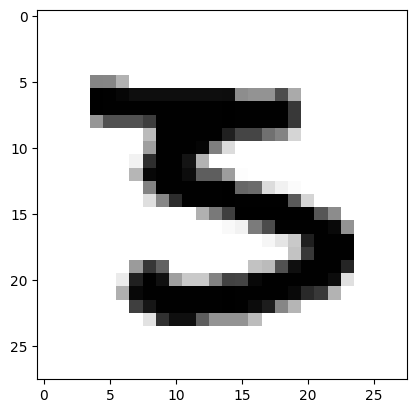

Value: 3


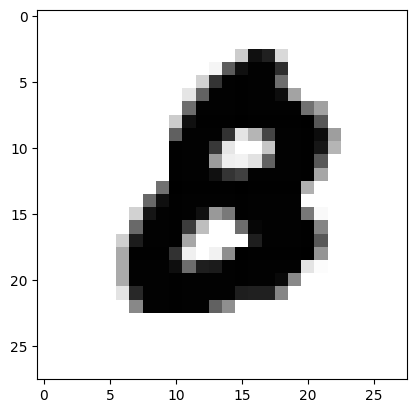

Value: 3


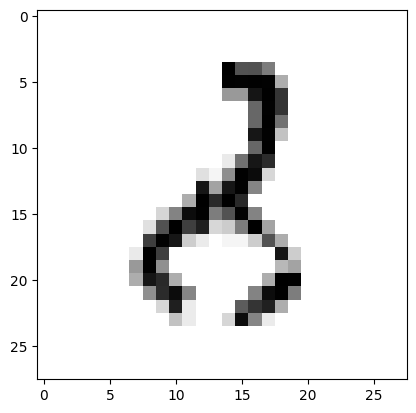

Value: 8


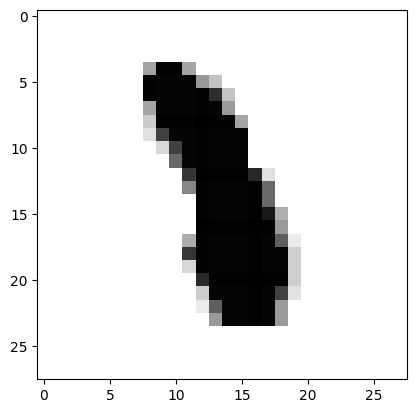

Value: 7


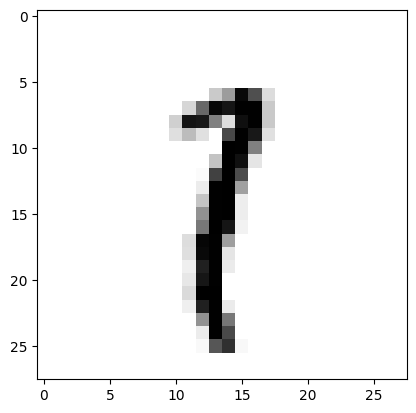

Value: 3


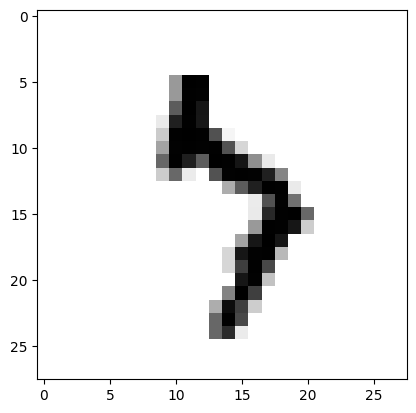

Value: 9


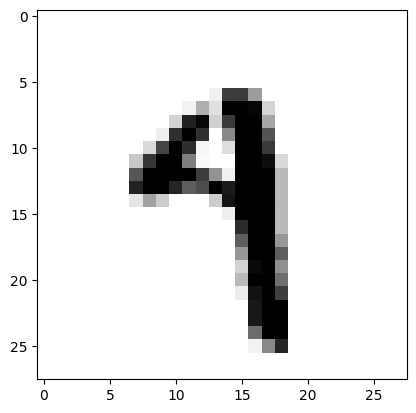

Value: 8


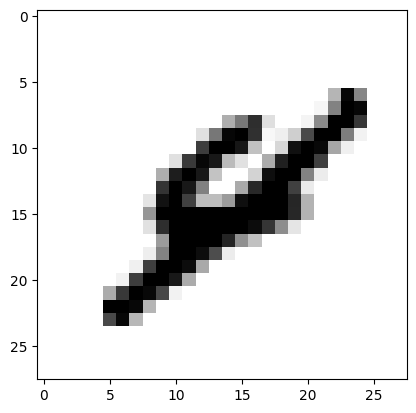

Value: 5


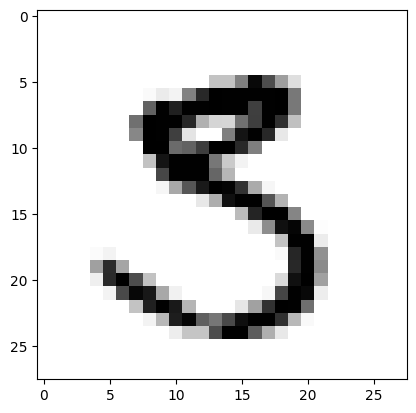

Value: 9


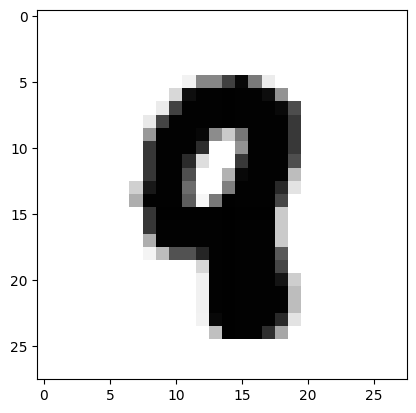

Value: 5


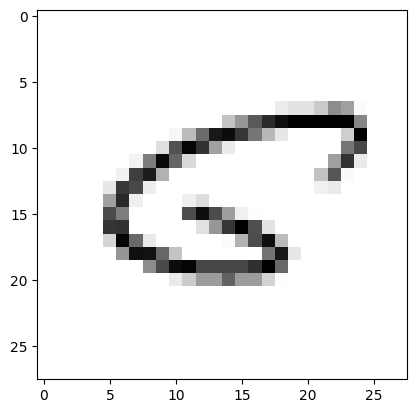

Value: 6


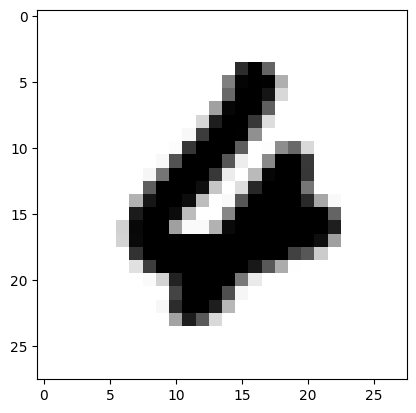

Value: 5


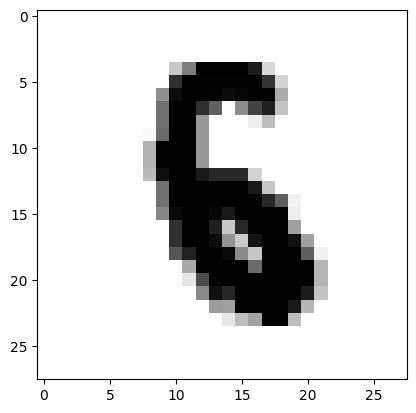

Value: 4


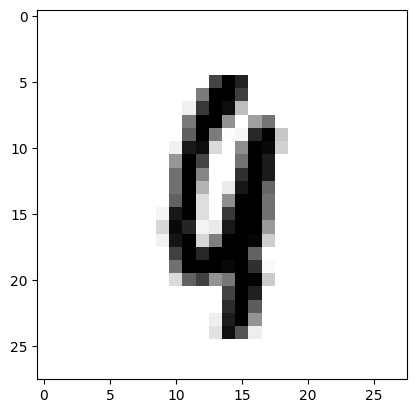

Value: 3


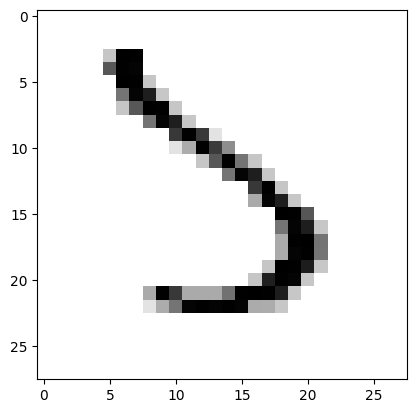

Value: 7


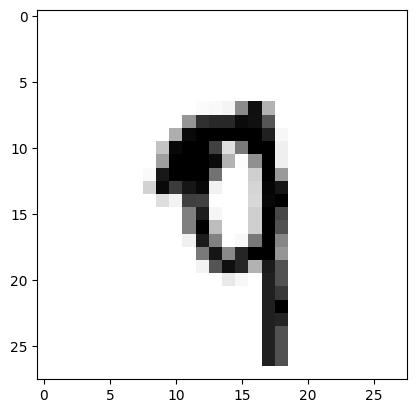

Value: 3


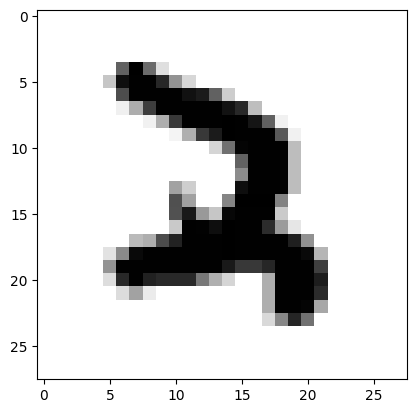

Value: 3


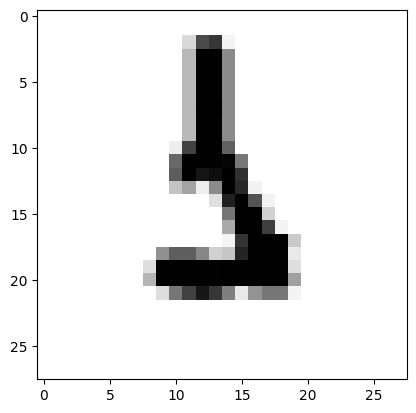

Value: 6


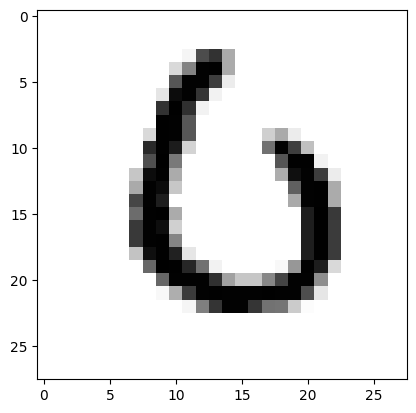

Value: 3


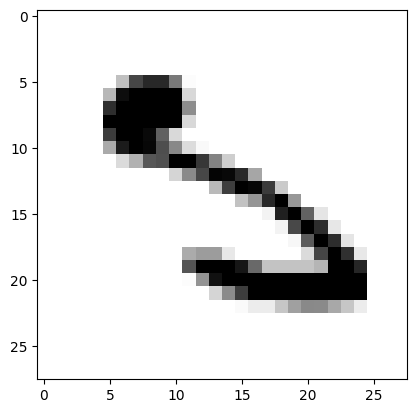

Value: 7


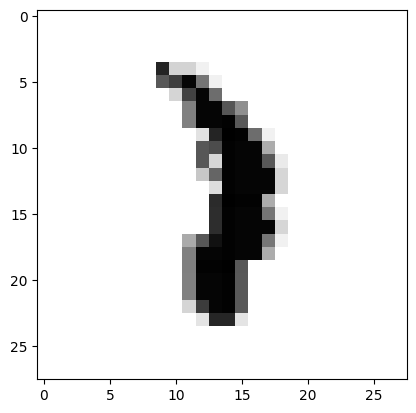

Value: 3


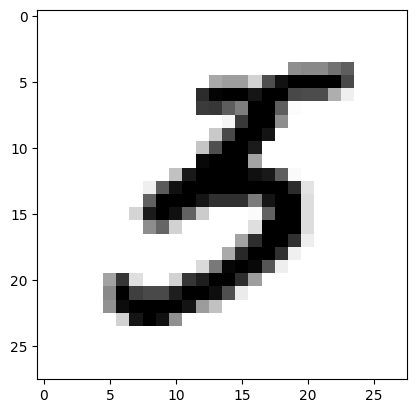

Value: 0


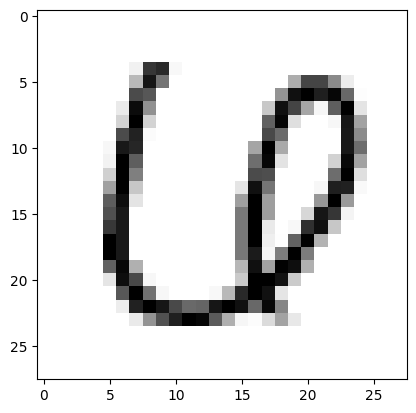

Value: 9


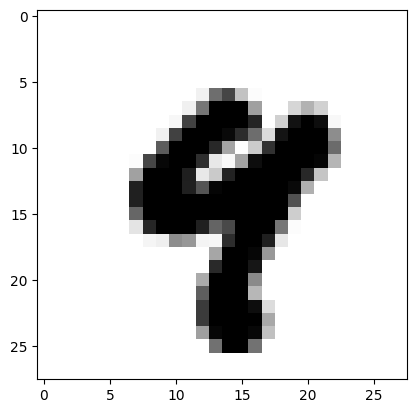

Value: 3


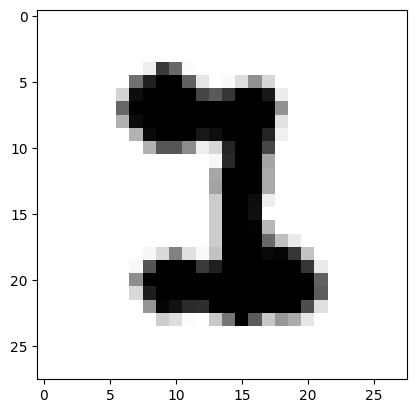

Value: 3


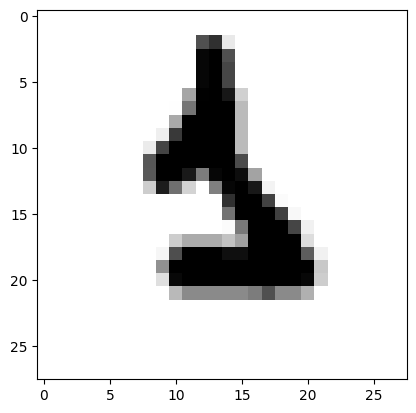

Value: 9


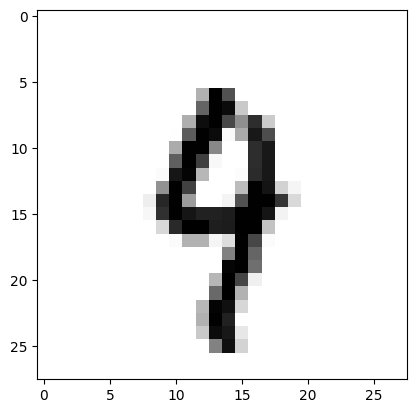

Value: 3


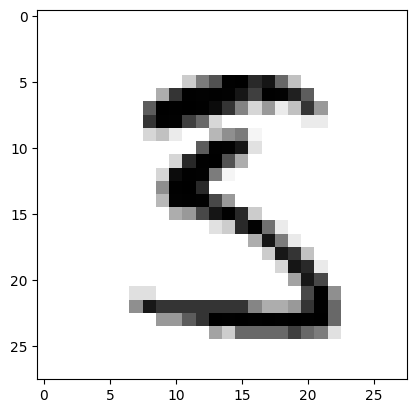

Value: 1


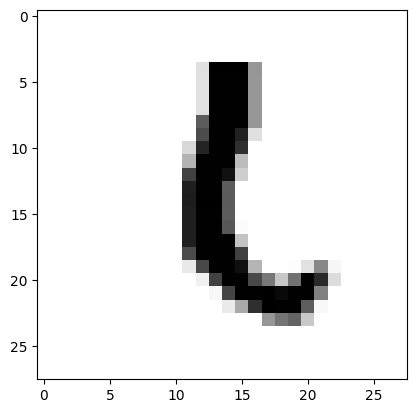

Value: 2


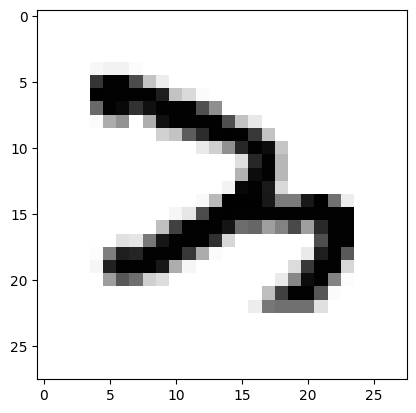

Value: 5


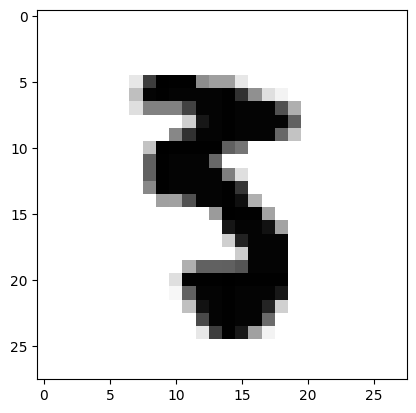

Value: 5


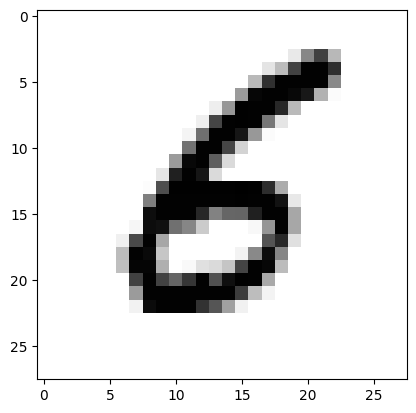

Value: 9


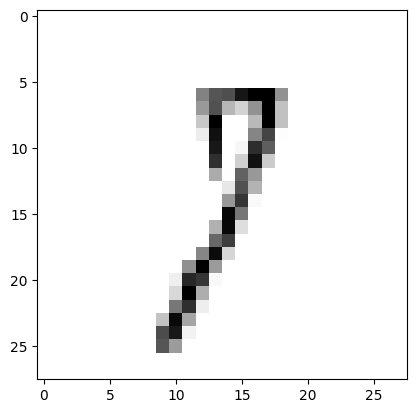

Value: 0


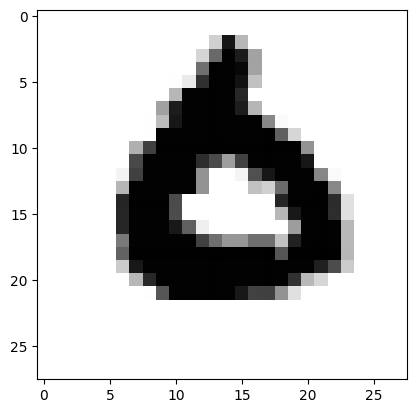

Value: 2


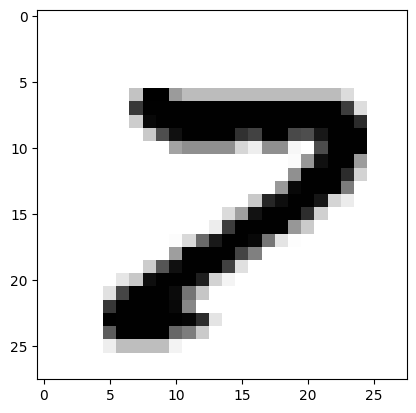

Value: 6


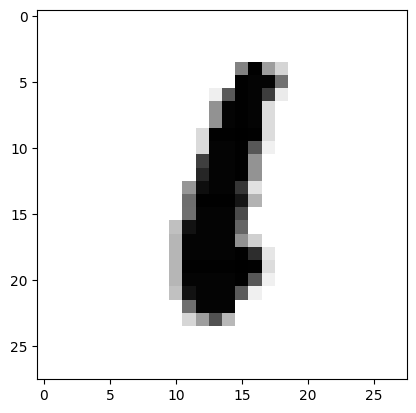

Value: 4


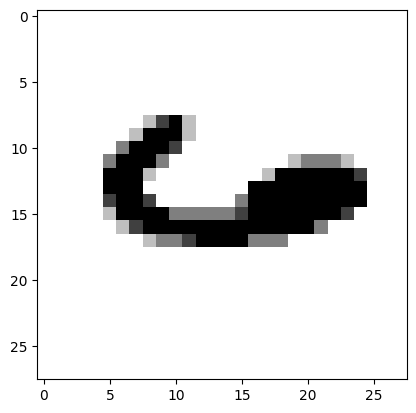

Value: 2


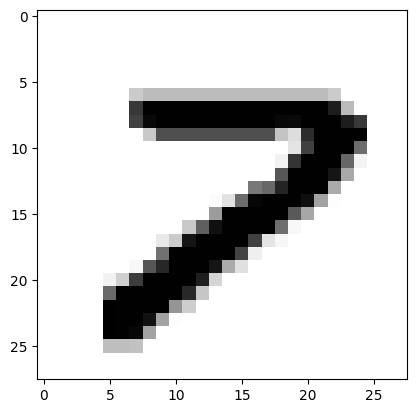

Value: 3


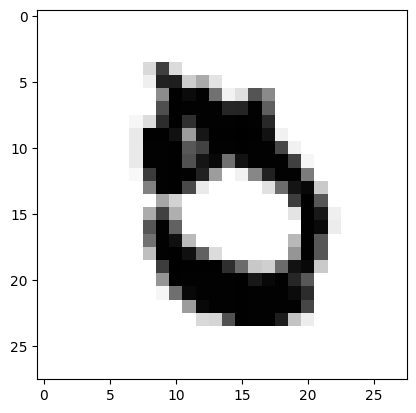

Value: 3


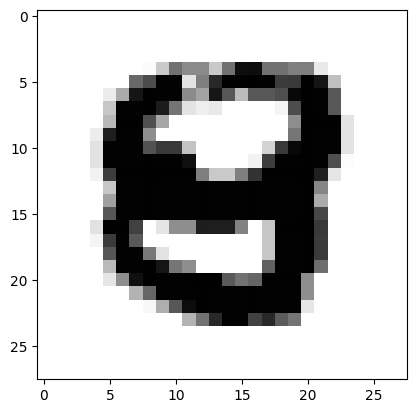

Value: 8


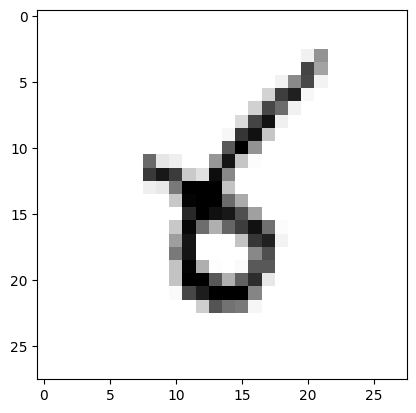

Value: 2


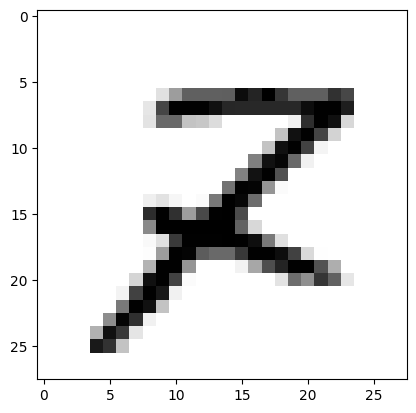

Value: 2


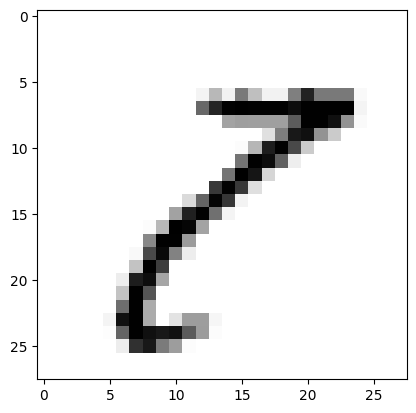

Value: 8


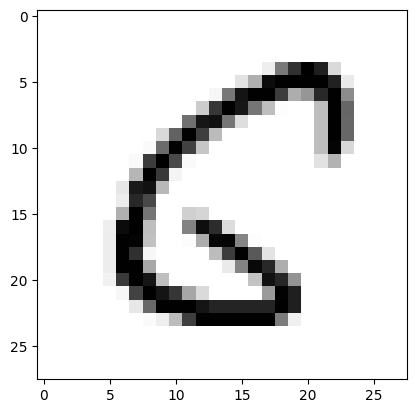

Value: 8


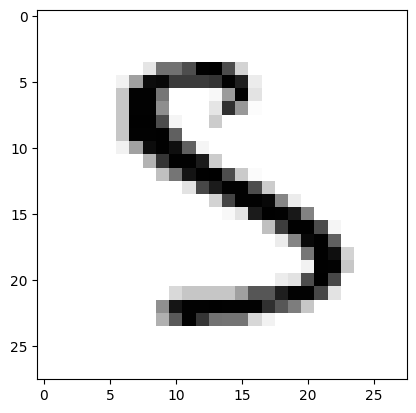

Value: 7


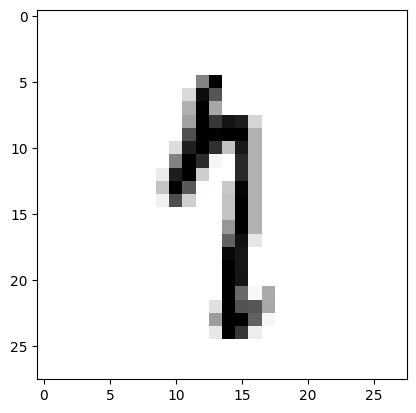

Value: 5


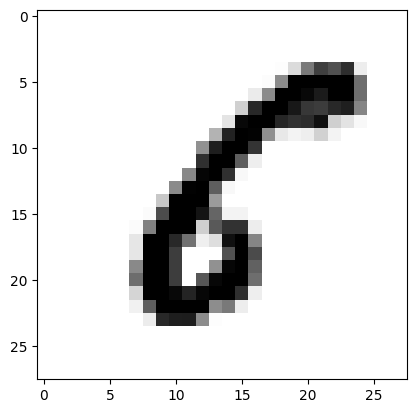

Value: 2


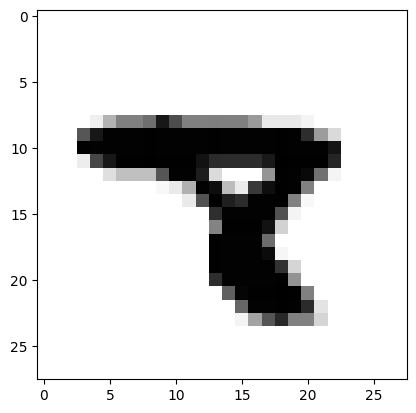

Value: 9


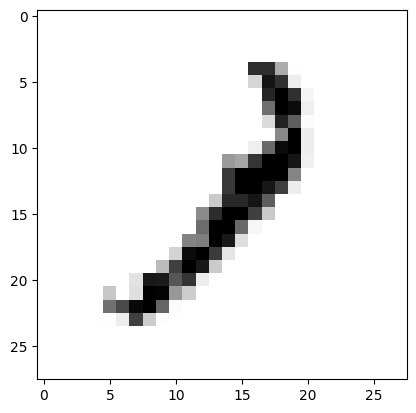

Value: 8


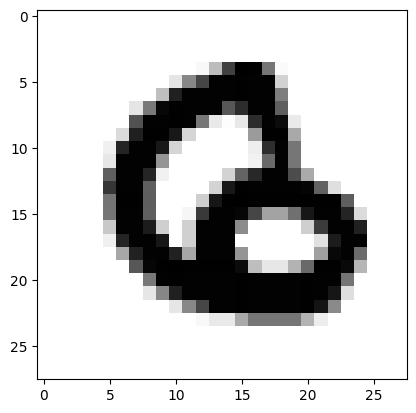

Value: 9


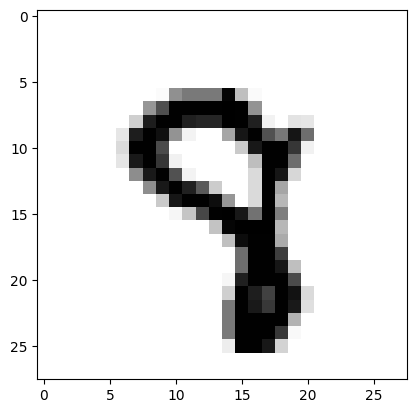

Value: 3


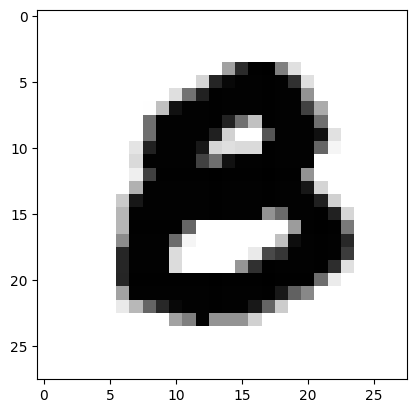

Value: 5


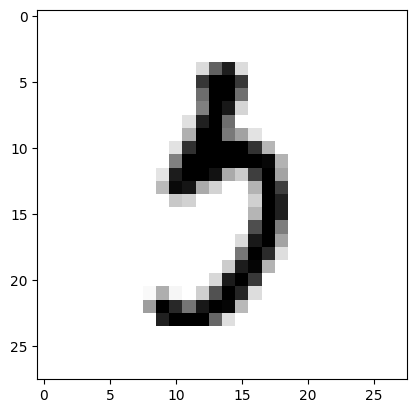

Value: 4


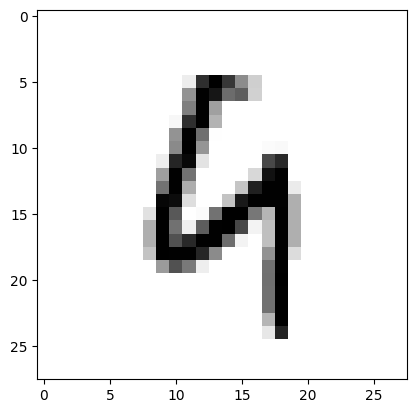

Value: 9


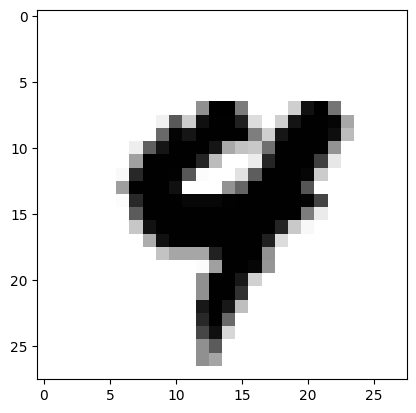

Value: 3


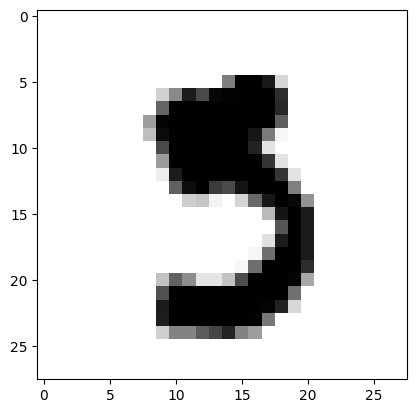

Value: 9


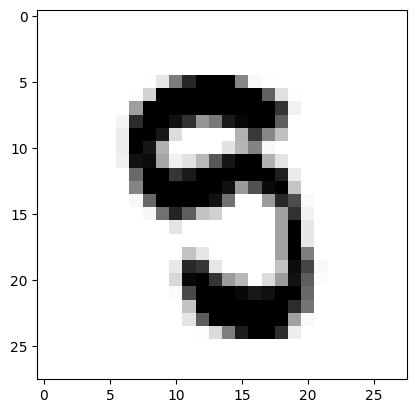

Value: 7


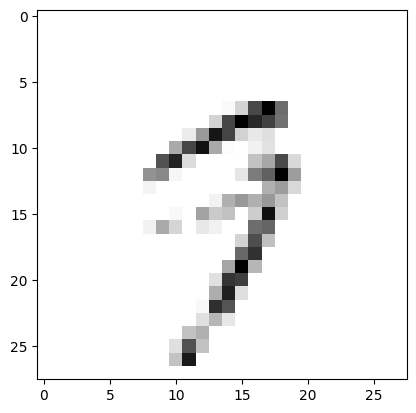

Value: 5


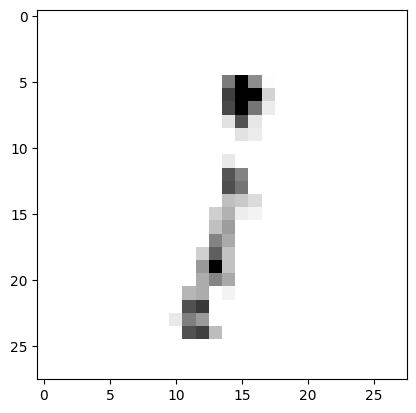

Value: 1


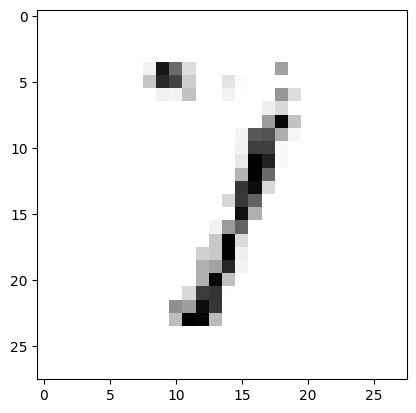

Value: 7


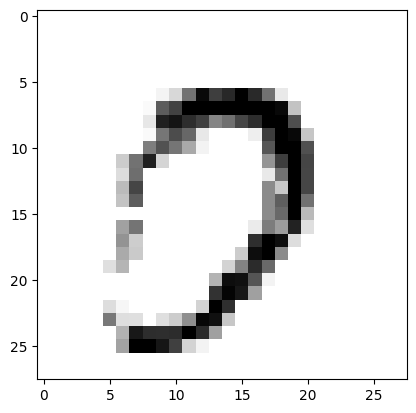

Value: 2


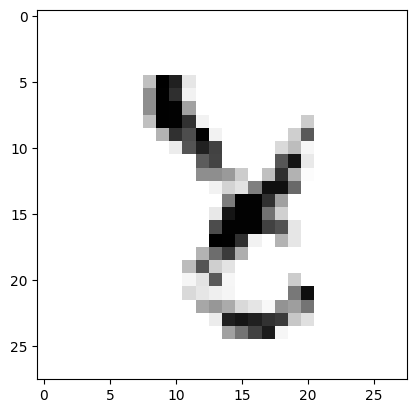

Value: 8


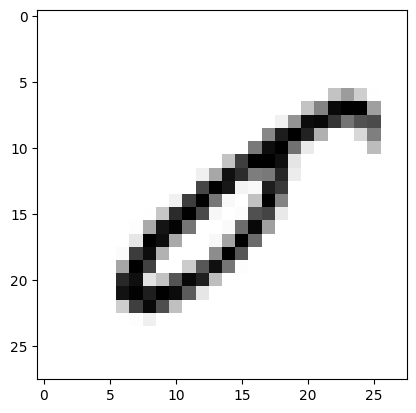

Value: 6


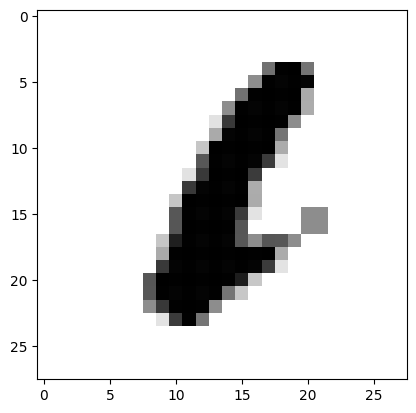

Value: 8


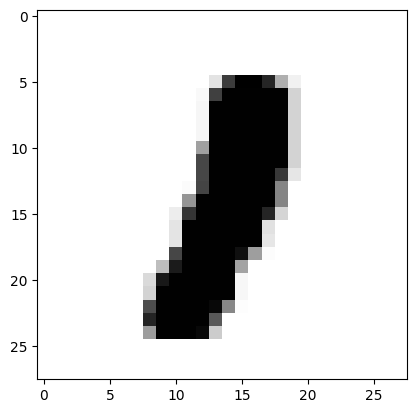

Value: 0


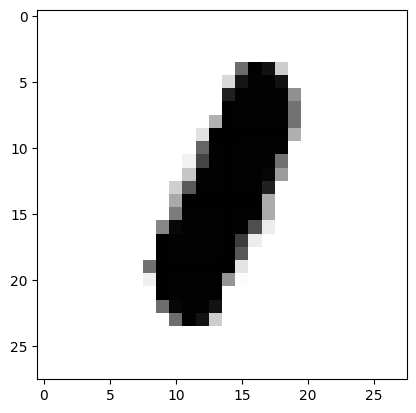

Value: 0


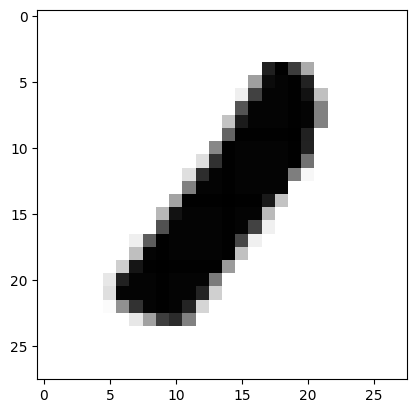

Value: 0


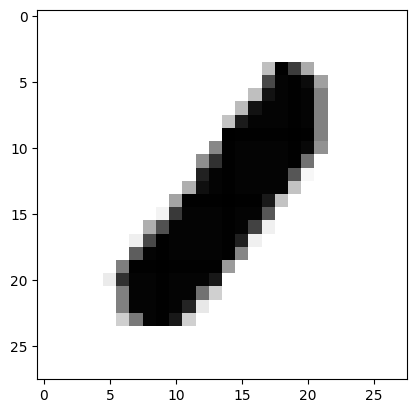

Value: 0


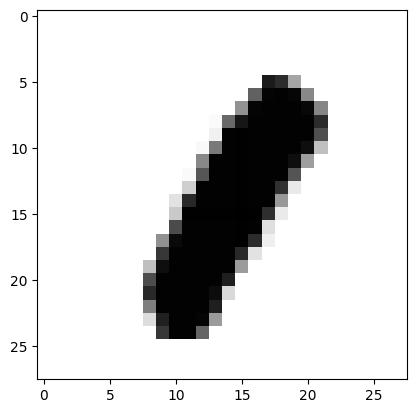

Value: 0


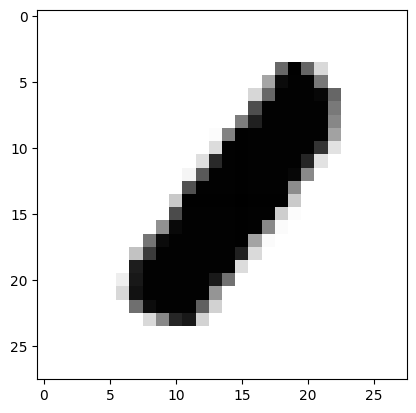

Value: 2


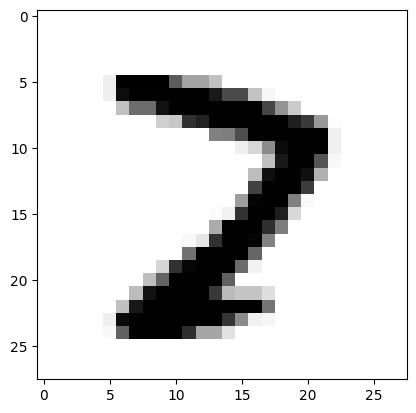

Value: 5


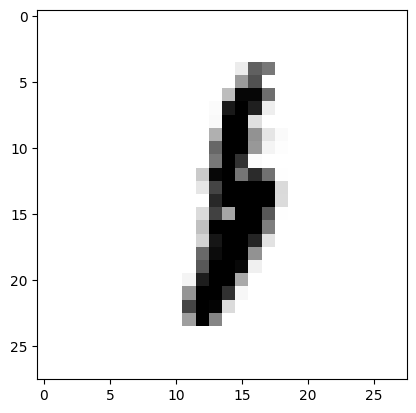

Value: 2


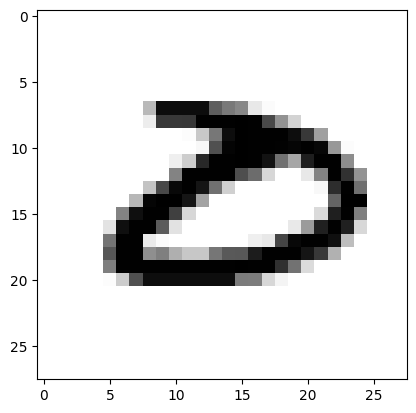

Value: 5


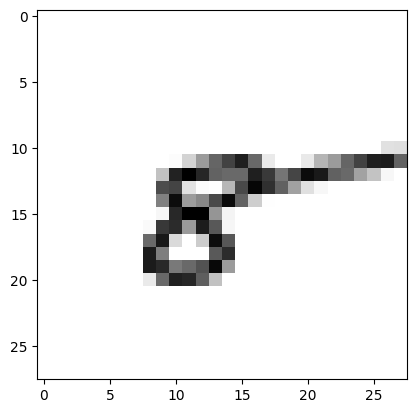

Value: 9


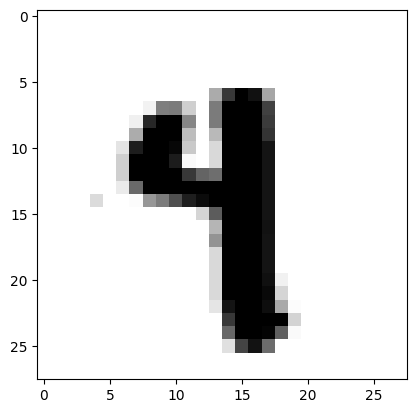

Value: 8


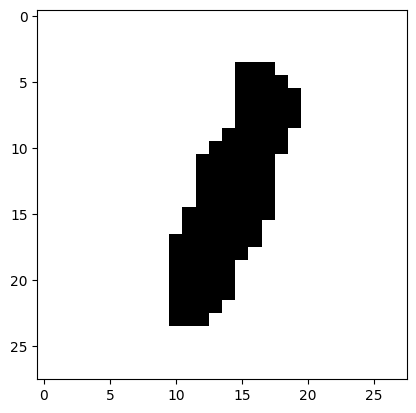

Value: 7


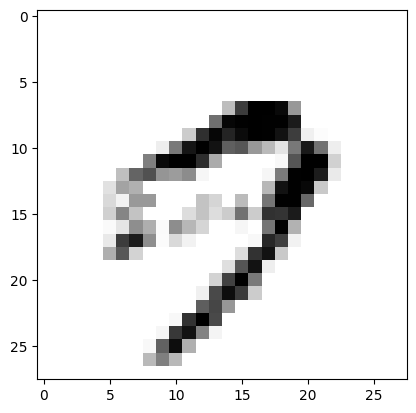

Value: 7


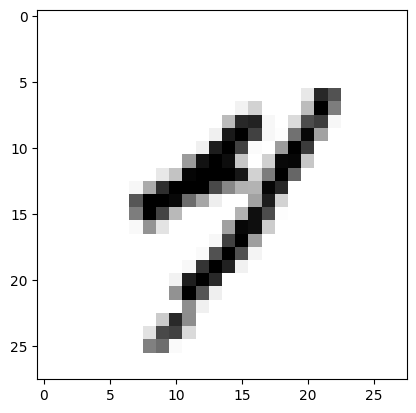

Value: 6


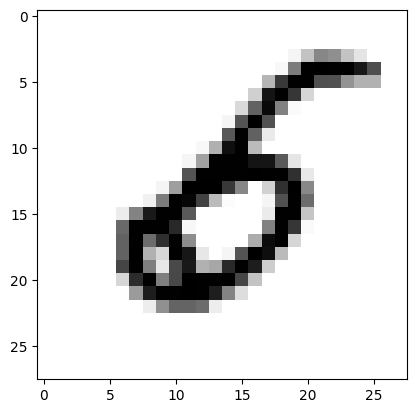

Value: 8


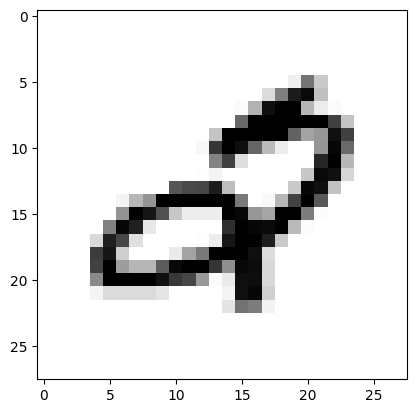

In [11]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis = 1)

mask = pred == y_test
x_false = x_test[~mask]
p_false = pred[~mask]
print(len(p_false))

for i in range(len(p_false)):
  print("Value: " + str(p_false[i]))
  plt.imshow(x_false[i], cmap = plt.cm.binary)
  plt.show()